# Research Methods <br>UHH - Knowledge Technology Research Group - WiSe 2024/2025
## Assignment #5 - Estimated Sample Distribution & Empirical Sampling

***
### Group: B
### Names of members: Volha Stehling, Nhat Minh Phuong Nguyen, Kashf Jahangir

***

### Instructions:

Please answer the questions below. Copy this notebook and enter your answers underneath each task description, inserting cells as needed. You may use a combination of [python 3](https://www.python.org), [markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), and [LaTex](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) to formulate your responses. In order to successfully complete the assignment, you will need the lecture material provided in the [RM moodle course](https://lernen.min.uni-hamburg.de/course/view.php?id=4709), especially L08 & L09.

**Make sure to use only a copy of this notebook for your answers instead of a new/blank notebook.**

### Grading Criteria:

In order to successfully pass this assignment, you will need **at least a total of 70 points out of 100 points**, and **every** task has to be tackled.

### Submission:

Please upload the following two files **until Tuesday, January 7, 2025, 20:00 CET (Germany)** together in a .zip archive in moodle:
1. a (single) copy of this jupyter notebook containing your answers for all tasks (file extension: .ipynb)
2. an [exported PDF document](https://jupyterlab.readthedocs.io/en/stable/user/export.html) of the jupyter notebook (file extension: .pdf)

### Presentation:

Make sure that each (!) group member takes part in solving this assignment and is prepared to answer questions and/or present solutions from your submitted notebook during our assignment revision meeting scheduled for **Wednesday, January 15, 2025, 10:00 - 13:00 CET (Germany)**.

### File Naming:

Add the group letter to the file name prior to submission. For example, if your group letter is "A" (see group selection in moodle), you would use the following filename: 
1. RM_A05_Group_A.ipynb 
2. RM_A05_Group_A.pdf

***
***

#### Task 1 **[40 points] Hypothesis Testing**

In Assignment 2 (Task 4), you investigated monthly temperature changes over a 50-year period for Spain and Pakistan. One hypothesis was that Pakistan was more affected than Spain by climate change. For this task, you will need to compute the temperature difference for each month starting from January 1964 compared to that same month in 1914 (e.g., comparing January 1964 with January 1914, February 1964 with February 1914, and so on). As a result, you have two datasets (one for Spain and one for Pakistan) each representing the monthly change in temperature over a 50-year span.

**Research Question:** *Is the average long-term warming (as measured by the 50-year temperature differences) in Pakistan significantly greater than the average long-term warming in Spain?*

1. Clearly state the null ($H_0$) and alternative ($H_1$) hypotheses that correspond to the above research question.
2. a. Identify an appropriate statistical test to compare the mean temperature differences from the two samples (Pakistan vs. Spain) and justify why this test is suitable.<br>
   b. Specify the underlying assumptions of the test (e.g., data scale, normality, independence, sample size considerations).<br>
   c. State the parameters you used (e.g., significance level, one-tailed vs. two-tailed) and conduct the test.
3. Present your test results in a scientifically appropriate manner. Discuss whether there is a statistically significant difference between the two countries’ temperature changes. Consider potential limitations such as data quality, sample size, time-period selection, or other contextual factors.
4. Determine the statistical power and effect size for your chosen test. Explain what these values mean in the context of your analysis and discuss factors that may have influenced the power and the practical importance of the observed effect size.


### Task 1.1

**Research question**: Is the average long-term warming (as measured by the 50-year temperature differences) in Pakistan significantly greater than the average long-term warming in Spain?

* $H_0$: The average long-term warming in Pakistan is less than or equal to that in Spain.
* $H_1$: The average long-term warming in Pakistan is greater than to that in Spain.

### Task 1.2

**Test: Mann-Whitney U Test**
- The Mann-Whitney U Test is appropriate because:
    - Independent Samples: We have two independent groups (temperature changes in Pakistan and Spain), meaning the observations in one group do not affect the observations in the other.
    - Continuous Ratio Data: The Temperature Difference variable represents continuous temperature change data over a 50-year span. 
    - Normality: From the histogram charts and the shapiro test, we can see that Pakistan's data is not normally distributed, while Spain has a normal distribution.
- Assumptions:
    - Observations in each group must be independent of each other. This means that the temperature changes in one country do not affect those in the other. We can made this assumption based on 2 countries' different geography. However, it is essential to recognize that while geographical independence typically holds, the climate is interconnected, and anomalies can affect both datasets. Therefore, complete certainty may not be assured.
    - The 2 groups' distributions should not be too different from each other. We can visualize their shapes by histograms.

In [230]:
import statsmodels.stats.api as sms
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import fft
import numpy as np
from scipy import stats
import statsmodels.stats.power as smp
from scipy.stats import pearsonr
from scipy.stats import norm

In [4]:
data = pd.read_csv("./data/CRU_data.csv", sep=";")

# Define monthly columns
monthly_columns = [f'TMP_MEAN_{month}' for month in \
    ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]]

# Filter rows for Pakistan and Spain from the year 1964 onward, ignoring rows with -999 values
data_filtered = (
    data.query("COUNTRY in ['PAKISTAN', 'SPAIN']")
    .set_index(["COUNTRY", "YEAR"])
    .loc[:, monthly_columns]
    .replace(-999.0, pd.NA)
    .dropna()
)

data_filtered.head(3)

TMP_MEAN_JAN  TMP_MEAN_FEB  TMP_MEAN_MAR  TMP_MEAN_APR  \
COUNTRY  YEAR                                                           
PAKISTAN 1901           8.2           9.8          17.0          21.7   
         1902          10.0          11.5          17.4          22.3   
         1903           8.3          10.3          14.2          20.5   

               TMP_MEAN_MAY  TMP_MEAN_JUN  TMP_MEAN_JUL  TMP_MEAN_AUG  \
COUNTRY  YEAR                                                           
PAKISTAN 1901          26.4          29.7          29.5          28.1   
         1902          26.9          29.3          29.4          28.6   
         1903          25.9          30.1          29.3          27.9   

               TMP_MEAN_SEP  TMP_MEAN_OCT  TMP_MEAN_NOV  TMP_MEAN_DEC  
COUNTRY  YEAR                                                          
PAKISTAN 1901          25.9          21.7          16.1          11.2  
         1902          25.6          21.3          15.5          10.2  
         1903          26.1          21.4          14.6           9.8

In [359]:
monthly_avg_df = pd.DataFrame(columns=["COUNTRY", "YEAR", "MONTH","CHANGE"])

end_year = 2023
start_year = 1964
for year in range(start_year, end_year + 1):
    comparison_year = year - 50

    data_current = data_filtered.xs(year, level="YEAR")
    data_comparison = data_filtered.xs(comparison_year, level="YEAR")
    
    change = data_current.subtract(data_comparison)
    

    monthly_comparison = change.reset_index()
    # monthly_comparison = pd.DataFrame(columns=["COUNTRY", "YEAR", "MONTH","CHANGE"])
    monthly_comparison["YEAR"] = year
    monthly_comparison = monthly_comparison.melt(id_vars=["COUNTRY", "YEAR"], var_name="MONTH", value_name="CHANGE")
    monthly_comparison["MONTH"] = monthly_comparison["MONTH"].str.replace("TMP_MEAN_", "")
    monthly_comparison = monthly_comparison.rename(columns={"COUNTRY": "COUNTRY"})
    
    monthly_avg_df = pd.concat([monthly_avg_df, monthly_comparison], ignore_index=True)
    

monthly_avg_df['Time'] = pd.to_datetime(monthly_avg_df['YEAR'].astype(str) + ' ' + monthly_avg_df['MONTH'], format='%Y %b')


/var/folders/l1/9005lr5n2b367m3p2bg7bgk80000gn/T/ipykernel_42962/889231642.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  monthly_avg_df = pd.concat([monthly_avg_df, monthly_comparison], ignore_index=True)


In [442]:
#Describe the dataset
spain_df = monthly_avg_df[monthly_avg_df['COUNTRY'] == "SPAIN"]
spain_df.describe()


,CHANGE,Time
count,720.000000,720
mean,0.787083,1993-12-15 23:00:00
min,-3.600000,1964-01-01 00:00:00
25%,-0.200000,1978-12-24 06:00:00
50%,0.850000,1993-12-16 12:00:00
75%,1.725000,2008-12-08 18:00:00
max,4.700000,2023-12-01 00:00:00
std,1.450006,NaN


In [360]:
pakis_df = monthly_avg_df[monthly_avg_df['COUNTRY'] == "PAKISTAN"]
pakis_df.describe()

,CHANGE,Time
count,720.000000,720
mean,0.475000,1993-12-15 23:00:00
min,-4.400000,1964-01-01 00:00:00
25%,-0.325000,1978-12-24 06:00:00
50%,0.400000,1993-12-16 12:00:00
75%,1.200000,2008-12-08 18:00:00
max,5.600000,2023-12-01 00:00:00
std,1.383074,NaN


#### Checking data's normality

We check the data's shape and distribution using histograms and Sharpio test

<Axes: >

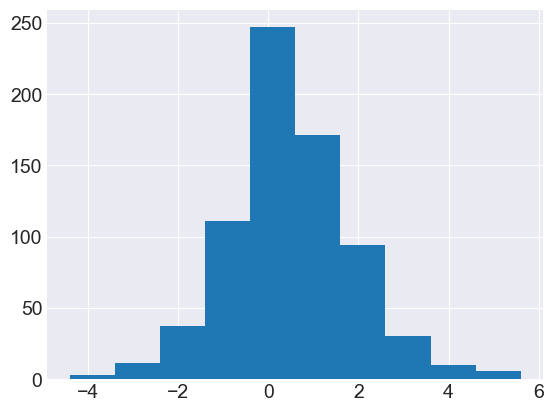

In [361]:
pakis_df['CHANGE'].hist()

The histogram shows that Pakistan's data seems to have a kurtosis distribution

<Axes: >

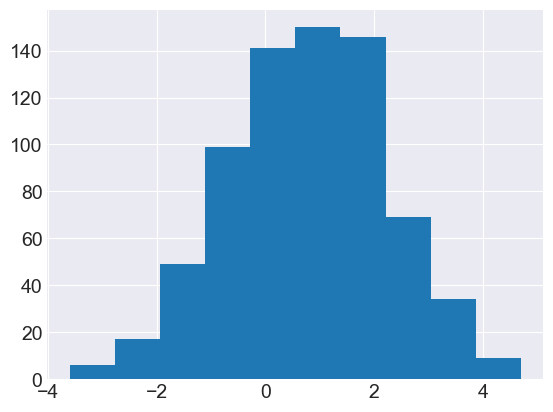

In [362]:
spain_df['CHANGE'].hist()

The histogram shows that Spain's data has a normal distribution, perhaps slightly left-skewed

In [355]:
def sharpio_test(data, country):
    shapiro_test = stats.shapiro(data)
    print(f'Shapiro-Wilk Test for {country}: Statistics={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

    if shapiro_test.pvalue > 0.05:
        print(f'{country}\'s data is normally distributed (fail to reject H0)')
    else:
        print(f'{country}\'s data is not normally distributed (reject H0)')

In [356]:
sharpio_test(spain_df['CHANGE'], "Spain")
sharpio_test(pakis_df['CHANGE'], "Pakistan")
print("\nSince one of the group's data is not normally distributed (despite my attempts trying to increase the sample size),\
    \nit is best practice to avoid t-test. Normality is one of the reason why I chose Mann Whitney U test")

Shapiro-Wilk Test for Spain: Statistics=0.9975212224928139, p-value=0.35877449541463113
Spain's data is normally distributed (fail to reject H0)
Shapiro-Wilk Test for Pakistan: Statistics=0.9843458838154098, p-value=5.768029728312821e-07
Pakistan's data is not normally distributed (reject H0)

Since one of the group's data is not normally distributed (despite my attempts trying to increase the sample size),    
it is best practice to avoid t-test. Normality is one of the reason why I chose Mann Whitney U test


### Task 1.2 C - Conduct the Mann Whitney U Test

Significance level: 0.05

Type of test: One-tailed Mann-Whitney-U test (greater than)

Sample size each group: 720

Data type: Continuous ratio data

In [372]:
u_statistic, p_value = stats.mannwhitneyu(pakis_df['CHANGE'], spain_df['CHANGE'], alternative='greater')

print(f"U-value: {u_statistic}")
print(f"P-value: {p_value}")
alpha = 0.05


if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference, Group 1 (Pakistan) is greater than Group 2 (Spain.")
else:
    print("Fail to reject the null hypothesis: Group 1 (Pakistan) is not greater than Group 2 (Spain).")
    


U-value: 222162.0
P-value: 0.9999986661576423
Fail to reject the null hypothesis: Group 1 (Pakistan) is not greater than Group 2 (Spain).


### Task 1.3

***Result Interpretation*** </br>
<p> The U-value indicates the rank sum for the observations in the two groups being compared. We got a really high U value for a sample size of 720 (u-value: 222162.0 / U_max: 259200) meaning that there are significant difference in the rank between 2 groups.</p>

<p> A p-value this high (p-value = 0.999) indicates that there is extremely strong evidence against the alternative hypothesis (H1).</p>

<p>This means that based on the temperature differences observed, I can conclude that there is no significant evidence to support my H1 hypothesis, and I failed to reject H0. We could not prove that "The average long-term warming in Pakistan is greater than to that in Spain." </p>

However, a large u-value and p-value suggest that the data is showing exactly opposite to what we have been trying to prove (the H1).

### Task 1.4

***Statistical power and effect size*** </br></br>
Determine the statistical power and effect size for your chosen test. Explain what these values mean in the context of your analysis and discuss factors that may have influenced the power and the practical importance of the observed effect size.


#### Estimating effect size

In [378]:
# Calculate Effect Size of MWU test
n1 = len(pakis_df['CHANGE'])
n2 = len(spain_df['CHANGE'])

N = n1 + n2
mean_U = n1 * n2 / 2
std_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

z = (u_statistic - mean_U) / std_U

# Calculate Effect Size (Cohen's r)
effect_size = abs(z) / np.sqrt(N)

print(f"Effect Size (Cohen's r): {effect_size:.3f}")
print(f'We calculated the effect size to get a specific result = {effect_size:.3f} - which indicates a small effect size')
print("\nTo compensate a small effect size, it would require a large sample size. We have a sample size of 720 for each group. \
    \nTo test the power, we applied Monte Carlo method")

Effect Size (Cohen's r): 0.124
We calculated the effect size to get a specific result = 0.124 - which indicates a small effect size

To compensate a small effect size, it would require a large sample size. We have a sample size of 720 for each group.     
To test the power, we applied Monte Carlo method


#### Estimating the power of the test

In [445]:
from scipy.stats import t

def generate_group2_samples(data): 
    return np.random.normal(np.mean(data), np.std(data), len(data))

def generate_group1_samples(data):
    desired_mean = np.mean(data)  # Mean from your actual data
    desired_std_dev = np.std(data)  # Std Dev from your actual data
    n_samples = len(data)  # Desired sample size
    dof = 5

    leptokurtic_samples = t.rvs(dof, size=n_samples)

    # Scale and shift the data to match desired mean and std deviation
    return desired_std_dev * (leptokurtic_samples - np.mean(leptokurtic_samples)) / np.std(leptokurtic_samples) + desired_mean

#Estimate test power using Monte Carlo
def simulate_power_mwu(num_simulations=500, alpha=0.05):
    rejections = 0
    
    for _ in range(num_simulations):
        # Generate random data for two groups

        spain_samples = generate_group2_samples(spain_df['CHANGE'])
        
        pakis_samples = generate_group1_samples(pakis_df['CHANGE'])
        
        # Mann-Whitney U test
        stat, p_value = stats.mannwhitneyu(spain_samples, pakis_samples, alternative='greater')
        
        if p_value < alpha:
            
            rejections += 1
    
    power = rejections / num_simulations
    return power


In [449]:
num_simulations = 500  # Number of simulations
alpha = 0.05  # Significance level

power_estimate = simulate_power_mwu(num_simulations, alpha)
print(f"Estimated Power of Mann-Whitney U Test for Spain and Pakis temperature data: {power_estimate:.3f}")
print('A power greater than 0.9 suggests a very high statistical power')
print('The complement of power is the probability of making a Type 2 error (denoted as beta, β). \
    \nA power of more than 0.9 corresponds to a β less than 0.1, meaning there is less than 0.1 chance of not detecting a true effect when one is present.')

Estimated Power of Mann-Whitney U Test for Spain and Pakis temperature data: 0.998
A power greater than 0.9 suggests a very high statistical power
The complement of power is the probability of making a Type 2 error (denoted as beta, β).     
A power of more than 0.9 corresponds to a β less than 0.1, meaning there is less than 0.1 chance of not detecting a true effect when one is present.


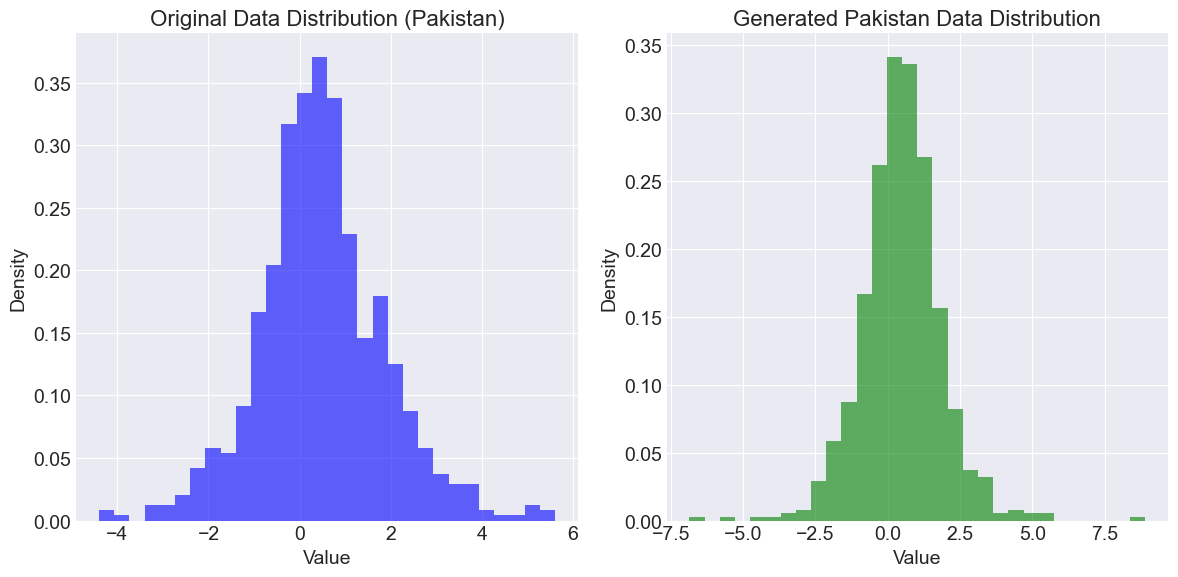

In [438]:
scaled_leptokurtic_samples = generate_group1_samples(pakis_df['CHANGE'])
# Plot the original 'CHANGE' data and the generated leptokurtic data for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(pakis_df['CHANGE'], bins=30, density=True, alpha=0.6, color='b')
plt.title('Original Data Distribution (Pakistan)')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(scaled_leptokurtic_samples, bins=30, density=True, alpha=0.6, color='g')
plt.title('Generated Pakistan Data Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

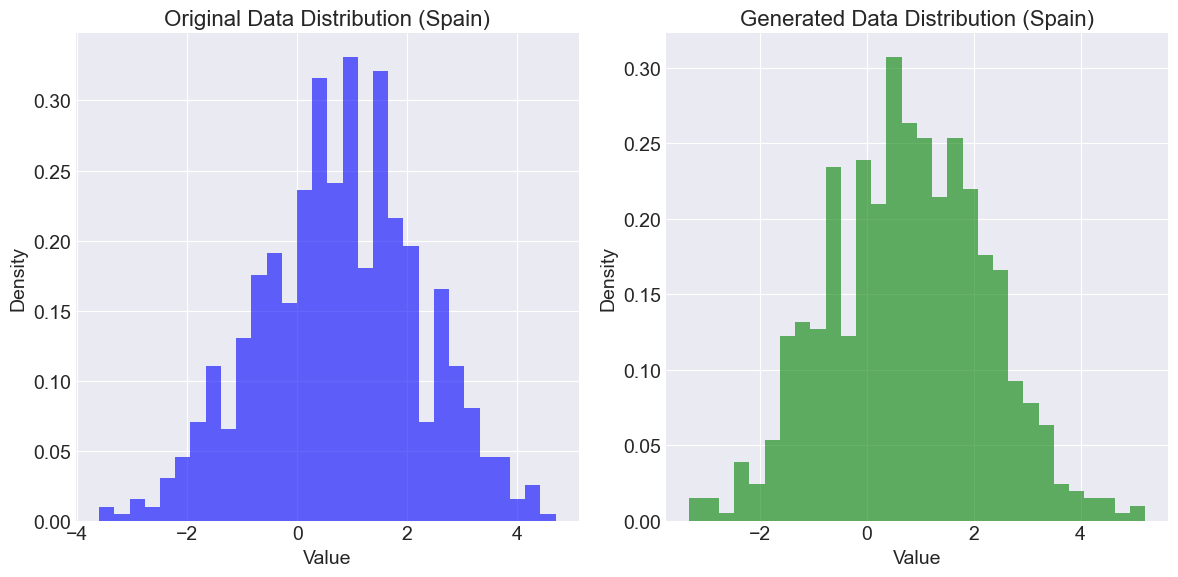

In [440]:
sample_data = generate_group2_samples(spain_df['CHANGE'])
# Plot the original 'CHANGE' data and the generated leptokurtic data for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(spain_df['CHANGE'], bins=30, density=True, alpha=0.6, color='b')
plt.title('Original Data Distribution (Spain)')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(sample_data, bins=30, density=True, alpha=0.6, color='g')
plt.title('Generated Data Distribution (Spain)')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

We plotted the sampled and the original data to see if the data is in the shape we want to simulate. From the charts, we can see that the generated samples and the original data share the similar shape and structure (mean and std)

#### Discussion and Conclusion:

**Time-period selection**: The dataset consists of monthly temperature differences spanning a 50-year period (1964 vs. 1914). This provides a clear basis for assessing long-term temperature changes in both countries. The 50-year time span offers substantial data points and reduces the impact of short-term climatic variations.

**Continuous Ratio Data**: Temperature differences are measured in degrees, but they have a meaningful zero. 0 means there is no change.

**Significance level**: A significance level of 0.05 indicates a willingness to accept a 5% chance of incorrectly rejecting the null hypothesis

**p-value**: 0.999 - Fail to reject the Null Hypothesis. A p-value 0.99 is larger than any significance levels. This suggests that there is nearly no evidence to support the claim that the average long-term temperature change in Pakistan is greater than that in Spain.

**Effect size**: 0.124 - This is a small effect size. Small effect size indicates that while there may be a statistically significant difference between the groups, the magnitude of this difference is not large. This means that while the MWU test may find a significant difference, the practical implications of this difference might be small.

**Test power**: more than 0.9 - This is a large power, indicating there is a very small chance (< 0.1) of making Type 2 error. Despite having relatively small effect size, a large sample size of 720 items was able to reinforce the test power.


#### Task 2 **[60 points] Experiment Simulation**
In this task we want to simulate the process of human study participants using a Likert scale, to see (A) how such a scale changes the original data, and (B) how your analysis of the resulting data may be affected by different parameters.
Over the task you are going to do three things:
* Assume that the "real" answers (that people could give if asked on a continuous scale) are continuous, normally distributed around expected means.
* Match the answers that you sample from that distribution to a Likert Scale (i.e., choosing the answers that most closely match the answer the human wanted to give).
* Do analyses on the resulting sampling distribution to see what is possible and what the Likert data can reveal about the underlying distribution.<br>

We will use a 5-Point standard Likert scale: [strongly disagree, disagree, neutral, agree, strongly agree] and these answers would be coded for easier handling with the numbers [-2, -1, 0, 1, 2], respectively.

1. What problems do you expect if you use a Likert scale like this?

Your job is now to simulate the process using Monte-Carlo.</br> 
_Note: For the remainder of the task, we will use two groups (C)ontrol and (T)reatment. We will give population means as tuples (e.g., (-1,1)) to define the two distributions to draw from for the two groups. Through the simulation you want to test the following hypotheses:_ $H_0$: $\mu_A = \mu_B$, $H_1$: $\mu_A \neq \mu_B$

The aim of this exercise is to understand how Likert-Scales can be evaluated, how experiments with questionnaires can be analyzed, and what questions you have to ask if doing so. Write your code in a modular, reusable way to quickly explore different parameters/biases/methods. Think carefully about matching source and Likert scale correctly. And as always: Provide an interpretation for your diagrams and results!

2. a. How do the sampling distributions look like for $H_0$ and $H_1$ for means (-1,1)? Choose a meaningful standard deviation for both groups. Visualize and interpret. <br>
   b. Use the same tuple of means and the following additional tuples: (1,0), (1.5, 0.5), (-2,-1) and for each tuple use at least two different standard deviations (i.e., eight combinations in total). Plot frequencies of Likert scale values for all combinations. <br>
   _Hint: For this subtask it is okay to write one combined interpretation for all diagrams created._ <br>
   d. What would be your test statistic you are going to use for the hypothesis test and why? <br>
   e. How would you choose your sample size and sampling size? Why?
2. What is the power of a $t$-test (two-sample, independent) and the Mann-Whitney-U test for your eight combinations? Compute for all tuples of means and the standard deviations. Interpret your results.
3. How could you model common biases (at least two) and how would they affect the outcome and power? Use your expected tuples of means and the standard deviations. Compute, interpret, and visualize. <br>
    _Hint: In the lectures 06 and 07 some common biases for these kinds of scales were discussed, but you can also choose other common [response biases](https://en.wikipedia.org/wiki/Response_bias) that you find interesting._
4. For the tuple of means of (1.5, 0.5), how large would the sample have to be in order to get a power of 80% for α=5%? Use the two different standard deviations as used in subtask 2b.

### Solution

*1. What problems do you expect if you use a Likert scale like this?*

Using a 5-point Likert scale introduces several potential issues that can affect the accuracy, reliability, and interpretability of the data. Here are the key problems to consider:

**1. Loss of Information (Discretization Bias).**
Real responses are often continuous, but the Likert scale forces respondents into discrete categories. This can oversimplify nuanced differences between responses. Small differences in opinion might map to the same Likert category, while large differences could span only one level, potentially masking meaningful variability between groups.

**2. Central Tendency Bias.**
Respondents may gravitate toward the neutral or middle point (0), avoiding extreme responses. This can lead to underestimation of strong opinions or treatment effects, making it harder to detect meaningful differences between groups.

**3. Acquiescence Bias (Agreement Bias).**
Some respondents are more likely to agree with statements regardless of content. This skews results toward the positive end of the scale, inflating means and reducing variance, potentially introducing false positives when comparing groups.

**4. Ambiguity in Interpretation.**
Different respondents interpret the scale differently. "Agree" to one person might reflect a higher level of enthusiasm than it does to another. This inconsistency adds noise to the data, making it harder to detect real differences, especially in small samples.

**5. Limited Sensitivity (Ceiling/Floor Effects).**
The scale has fixed upper and lower bounds. Respondents who strongly agree beyond the highest category cannot express the intensity of their opinion. Extreme responses pile up at the top or bottom, creating floor/ceiling effects that limit differentiation, especially when populations show strong opinions.

**6. Non-Linearity of Scale.**
The distance between points on the Likert scale may not reflect equal psychological differences. The jump from "Neutral" to "Agree" might feel larger than from "Agree" to "Strongly Agree."  Applying parametric tests assumes equal intervals, potentially leading to misleading results when the scale is treated as linear.

**7. Social Desirability Bias.**
Respondents might choose more favorable answers to align with perceived social norms or expectations. This distorts the true distribution of responses, especially in sensitive topics like ethics or performance evaluations.

**8. Polarization.**
Some respondents avoid neutral options, forcing themselves into agreement or disagreement categories. This inflates variance artificially and may exaggerate differences between groups that aren't genuinely present.

**9. Inconsistent Group Comparisons.**
When comparing two groups (Control vs. Treatment), differences may be obscured by the scale’s limitations. One group’s distribution might shift slightly but remain within the same category, hiding underlying shifts. Real differences in mean response might not reflect in Likert-scale distributions, affecting hypothesis testing outcomes.

**10. Challenges in Statistical Analysis.**
Likert data is ordinal, but parametric tests (like t-tests) assume interval data. Treating Likert data as continuous can violate assumptions of normality and homoscedasticity. Analysis might lead to incorrect conclusions unless appropriate non-parametric tests (e.g., Mann-Whitney U) are used or interval approximations are justified.

**Summary of Key Risks:**
- **Bias and loss of granularity:** precision is sacrificed for simplicity.
- **Ambiguity and subjectivity:** respondents interpret scale points differently.
- **Statistical complexity:** data often violates assumptions required for standard tests.

*2. a. How do the sampling distributions look like for $H_0$ and $H_1$ for means (-1,1)? Choose a meaningful standard deviation for both groups. Visualize and interpret.*


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# Setting up plotting styles
plt.style.use("seaborn-v0_8-darkgrid")

# Set font sizes globally
plt.rcParams.update({
    'axes.titlesize': 16,   # Title font size
    'axes.labelsize': 14,   # Axis labels font size
    'xtick.labelsize': 14,  # X-tick labels font size
    'ytick.labelsize': 14,  # Y-tick labels font size
    'legend.fontsize': 14,  # Legend font size
    'font.size': 14         # General font size
})

### Monte Carlo Simulation

**2a. Sampling Distributions under $H_0$ and $H_1$ for Means (-1,1)**

Let's simulate Likert scale responses for two groups (Control and Treatment).

**Assumptions (based on the known parameters of the population):**
- The Control group ($C$) has a mean of -1.
- The Treatment group ($T$) has a mean of 1.
- Standard deviation (SD) is set to a reasonable value (e.g., 1).

We'll generate data from normal distributions and map the continuous values to the Likert scale:
- **Strongly Disagree (-2)** for values **x $<$ -1.5**
- **Disagree (-1)** for values between **-1.5 $\le$ x $<$ -0.5**
- **Neutral (0)** for values between **-0.5 $\le$ x $<$ 0.5**
- **Agree (1)** for values between **0.5 $\le$ x $<$ 1.5**
- **Strongly Agree (2)** for values **x $\ge$ 1.5**


### Continious Sampling Distributions

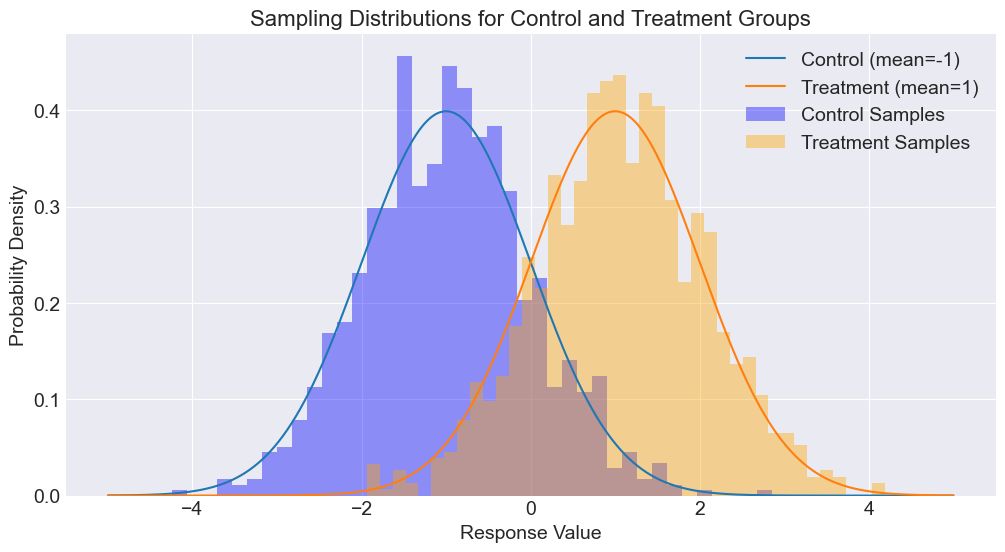

In [10]:
# Parameters
np.random.seed(42)
mu_control, mu_treatment = -1, 1  # Means for H0 and H1
sigma = 1  # Standard deviation for both groups
sample_size = 1000

# Generate samples
control_samples = np.random.normal(mu_control, sigma, sample_size)
treatment_samples = np.random.normal(mu_treatment, sigma, sample_size)

# Plotting
x = np.linspace(-5, 5, 1000)
control_pdf = norm.pdf(x, mu_control, sigma)
treatment_pdf = norm.pdf(x, mu_treatment, sigma)

plt.figure(figsize=(12, 6))
plt.plot(x, control_pdf, label=f'Control (mean={mu_control})')
plt.plot(x, treatment_pdf, label=f'Treatment (mean={mu_treatment})')
plt.hist(control_samples, bins=40, density=True, alpha=0.4, color='blue', label='Control Samples')
plt.hist(treatment_samples, bins=40, density=True, alpha=0.4, color='orange', label='Treatment Samples')

plt.title("Sampling Distributions for Control and Treatment Groups")
plt.xlabel("Response Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

The visualization shows the raw sampling distributions for the Control group (mean = -1) and the Treatment group (mean = 1) with a standard deviation of 1. The next step will involve mapping these continuous responses to the Likert scale and assessing how much this discretization affects the ability to detect differences. 

### Sampling Distributions Mapped to Likert Scale

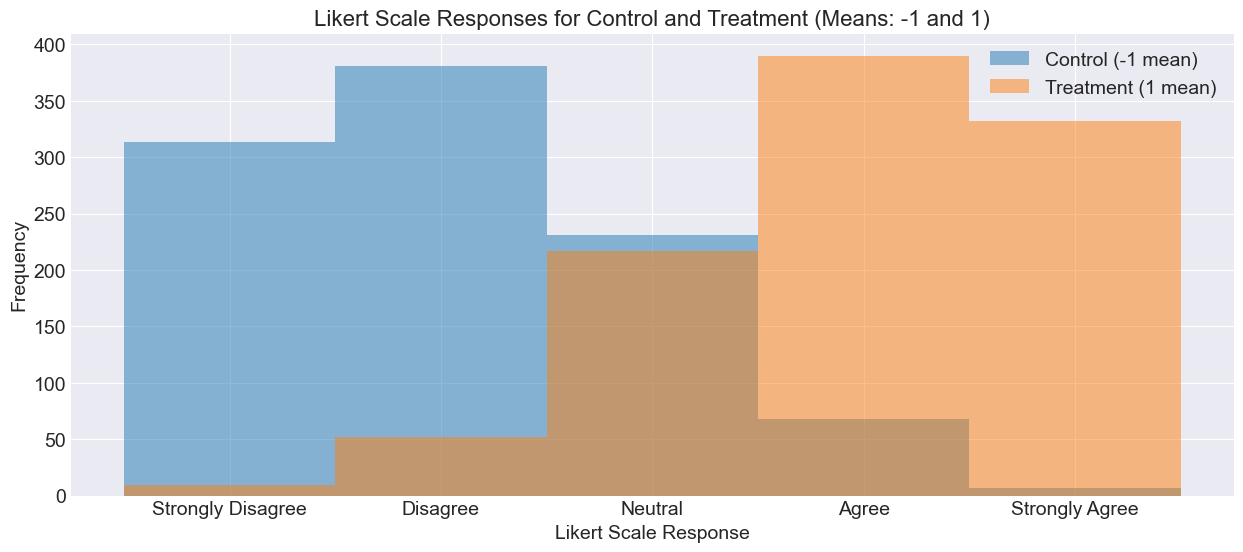

In [14]:
# Simulation parameters
np.random.seed(42)
sample_size = 1000  # Number of participants per group
means = [-1, 1]  # Mean for Control and Treatment
std_dev = 1  # Standard deviation for both groups

# Likert scale mapping function
def map_to_likert(values):
    return np.digitize(values, [-1.5, -0.5, 0.5, 1.5]) - 2

# Generate data for Control and Treatment groups
control_data = np.random.normal(loc=means[0], scale=std_dev, size=sample_size)
treatment_data = np.random.normal(loc=means[1], scale=std_dev, size=sample_size)

# Map to Likert scale
control_likert = map_to_likert(control_data)
treatment_likert = map_to_likert(treatment_data)

# Visualization of distributions
plt.figure(figsize=(15, 6))
plt.hist(control_likert, bins=np.arange(-2.5, 3), alpha=0.5, label='Control (-1 mean)')
plt.hist(treatment_likert, bins=np.arange(-2.5, 3), alpha=0.5, label='Treatment (1 mean)')
plt.xticks(np.arange(-2, 3), ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree'])
plt.xlabel('Likert Scale Response')
plt.ylabel('Frequency')
plt.title('Likert Scale Responses for Control and Treatment (Means: -1 and 1)')
plt.legend()
plt.show()

The plots shows how the distributions for **the Control (mean = -1) and Treatment (mean = 1) groups map to the Likert scale** with a standard deviation of 1. The Treatment group responses cluster more towards "Agree" and "Strongly Agree," while the Control group skews towards "Disagree" and "Strongly Disagree."

- **Control Group (Blue):** The distribution is centered at -1, representing the population mean for the Control condition.
- **Treatment Group (Orange):** The distribution is centered at 1, indicating a shift to the right relative to the Control group.
- **Overlap:** Despite the mean difference, there is considerable overlap between the two distributions. This overlap reflects variability in individual responses, which can complicate detecting significant differences, especially with smaller sample sizes.

We chose **a standard deviation of 1** because it strikes a balance between variability and interpretability in the context of Likert-scale simulations. Here’s the reasoning behind this choice:

1. **Moderate Overlap:**
A standard deviation of 1 ensures that the distributions for the Control and Treatment groups overlap but are still distinguishable. This mimics real-world scenarios where differences between groups exist but are not extreme.
If the standard deviation were much smaller (e.g., 0.2), the distributions would hardly overlap, making the differences too obvious. Conversely, a large standard deviation (e.g., 2 or more) would cause excessive overlap, making it difficult to detect differences.

2. **Consistency with Likert Scale:**
A standard deviation of 1 aligns with the natural spacing of the Likert scale, where increments between points (e.g., from -2 to -1, 0 to 1) reflect typical deviations in responses.
This value corresponds to the idea that most responses fall within one standard deviation (about 68% of data in a normal distribution), covering roughly one step on the Likert scale.

3. **Realism in Psychological and Social Sciences:**
In survey-based research, response variability often approximates a standard deviation around 1 when questions are designed to gauge moderate agreement or disagreement. This reflects the natural spread of opinions across populations.

4. **Testing Hypothesis Sensitivity:**
A standard deviation of 1 allows us to explore how well the discrete Likert scale can capture group differences. By simulating with moderate overlap, we can later adjust the standard deviation to observe how sensitivity changes (e.g., increasing variability reduces detection power).

**Visualizing $H_0$ and $H_1$:**
- Under $H_0$ (no difference), the two distributions would **overlap entirely**.
- Under $H_1$ (difference exists), the **separation between distributions becomes apparent**, though some overlap persists due to the shared standard deviation.

### Simulate Multiple Combinations of Means and Standard Deviations

**2b.** We'll now simulate and visualize **Likert scale responses for various combinations of means and standard deviations:**

**Means:**
- (-1, 1)
- (1, 0)
- (1.5, 0.5)
- (-2, -1)

**Standard Deviations:**
- 0.8
- 1.5

This results in **eight combinations**.

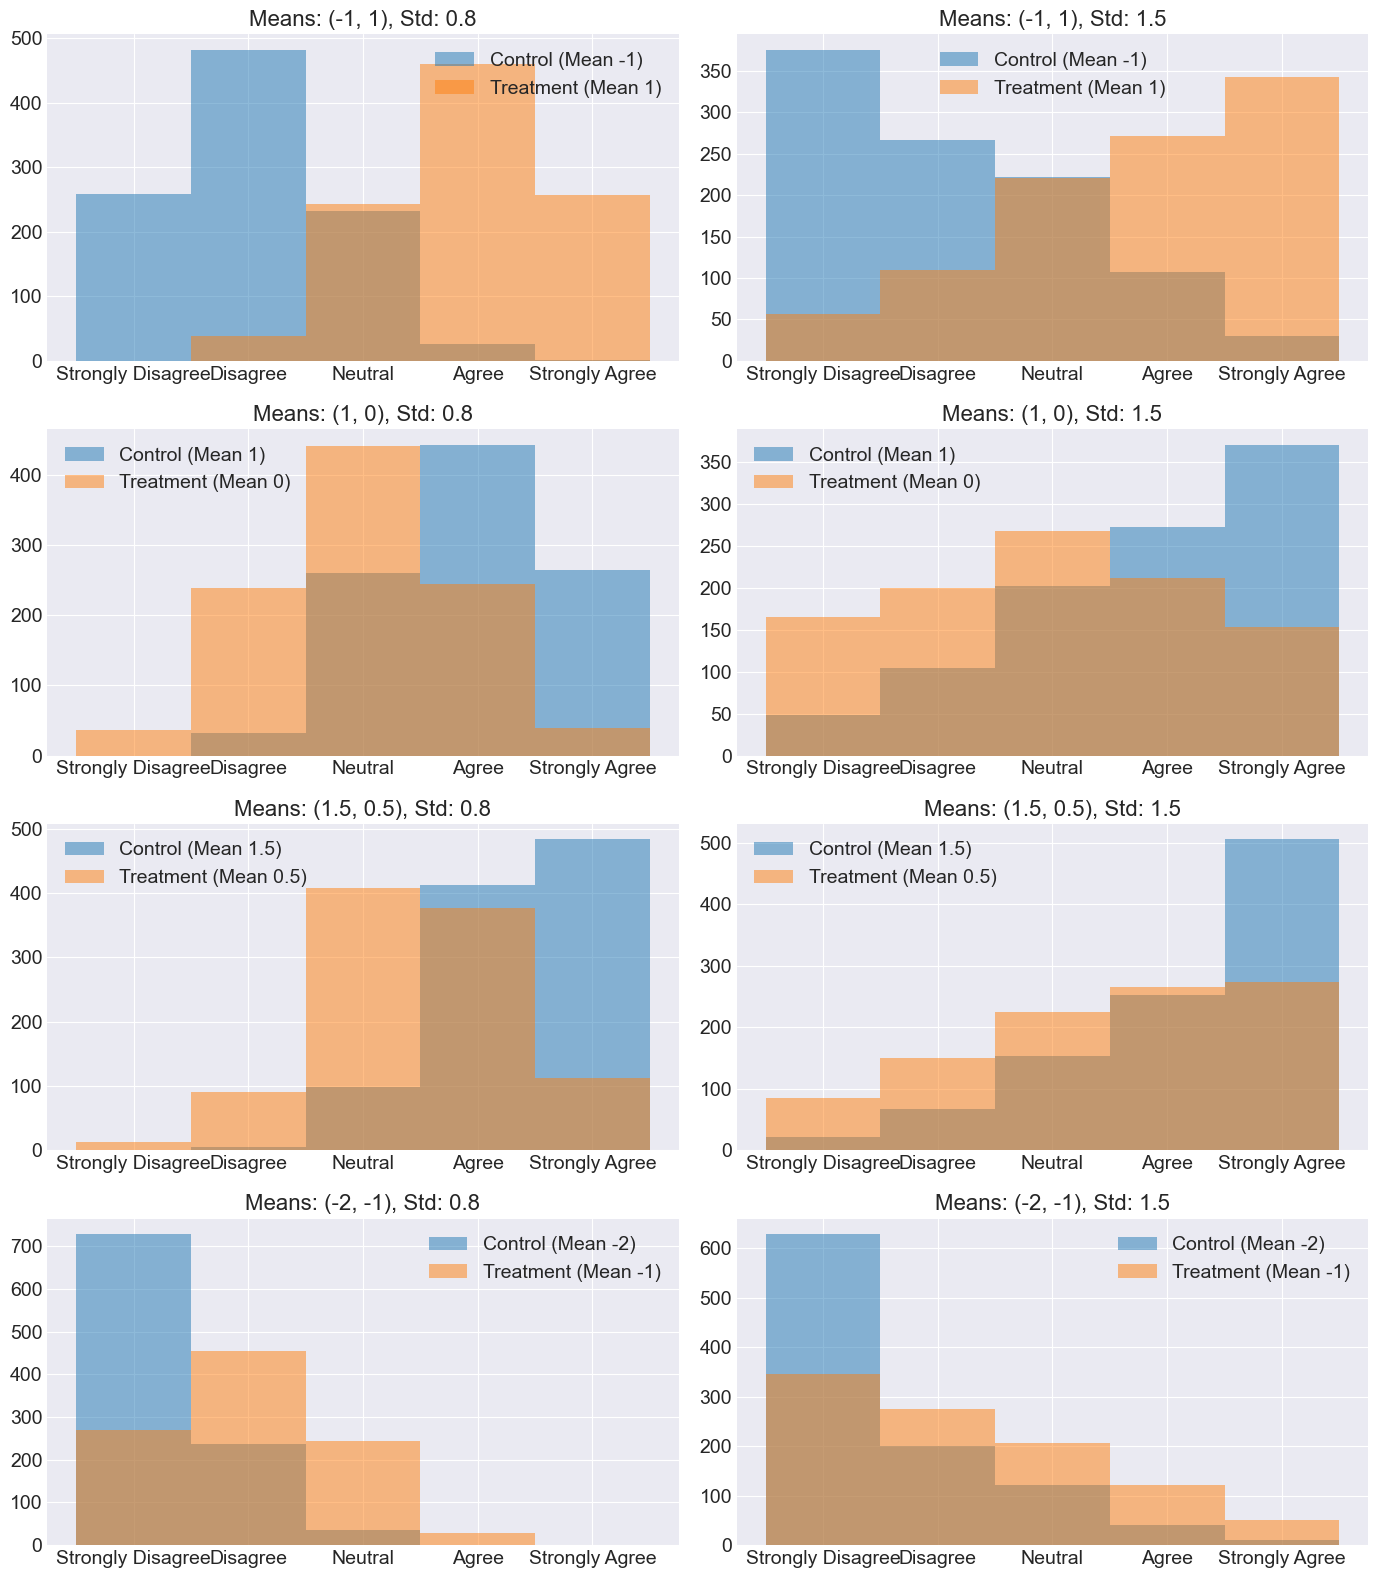

In [15]:
# Define multiple combinations of means and standard deviations
mean_combinations = [(-1, 1), (1, 0), (1.5, 0.5), (-2, -1)]
std_devs = [0.8, 1.5]

# Simulate and plot for each combination
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

for i, (mean_pair, std) in enumerate([(m, s) for m in mean_combinations for s in std_devs]):
    control_data = np.random.normal(loc=mean_pair[0], scale=std, size=sample_size)
    treatment_data = np.random.normal(loc=mean_pair[1], scale=std, size=sample_size)
    
    control_likert = map_to_likert(control_data)
    treatment_likert = map_to_likert(treatment_data)
    
    ax = axes[i]
    ax.hist(control_likert, bins=np.arange(-2.5, 3), alpha=0.5, label=f'Control (Mean {mean_pair[0]})')
    ax.hist(treatment_likert, bins=np.arange(-2.5, 3), alpha=0.5, label=f'Treatment (Mean {mean_pair[1]})')
    ax.set_xticks(np.arange(-2, 3))
    ax.set_xticklabels(['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree'])
    ax.set_title(f'Means: {mean_pair}, Std: {std}')
    ax.legend()

plt.tight_layout()
plt.show()

The plots illustrate the distributions of Likert scale responses for different mean pairs and standard deviations.

**Key observations:**

- **Spread Increases with Higher Standard Deviation:** When the standard deviation is larger (1.5), responses are more spread across the Likert scale, reducing the distinction between groups. Conversely, smaller standard deviations (0.8) lead to tighter clustering around the mean, making group differences more evident.
- **Mean Shifts Drive Response Skew:** Higher means (e.g., 1.5 vs. 0.5) shift responses towards the "Agree" end, while lower means (-2 vs. -1) skew towards "Disagree."
- **Overlap in Close Means:** For tuples like (1, 0), the distributions overlap significantly, making it harder to detect group differences.

### Test Statistic for Hypothesis Testing

*2d. What would be your test statistic you are going to use for the hypothesis test and why?*
- **Test Statistic:** A two-sample independent t-test will be used to test for mean differences between groups. This test assumes normality and equal variances, appropriate for comparing Likert scale means when mapped to continuous values.
- **Non-parametric Alternative:** If the Likert data is treated ordinally, the Mann-Whitney U test is preferred, as it does not assume normality and compares the ranks of responses.

### Sample Size and Sampling

*2e. How would you choose your sample size and sampling size? Why?*

Choosing the **sample size** (number of participants) and **sampling size** (number of times we simulate draws from the population) is critical for ensuring the results are reliable and reflect the true differences between groups.

**Choosing Sample Size  (Number of Participants per Group):**

Typical Range: **30 to 500** participants per group, depending on the study's goals. According to the Central Limit Theorem, even with small samples (~30), the distribution of sample means approximates normality. This helps ensure that the sampling distribution of the mean is stable. In real-world research (e.g., surveys, psychology studies), recruiting large numbers of participants can be costly and time-consuming. Generally, larger sample sizes reduce variability and increase the power of statistical tests. If it is known that the effect size is small, it requires  larger sample sizes to detect significant shifts.

**Choosing Sampling Size (Number of Simulations):**

Typical Range: **500 to 10,000 simulations**. In Monte-Carlo simulation, higher sampling sizes ensure smooth distributions and reduce random noise.  With more simulations, estimates (like mean and variance) stabilize and reflect true population properties. A larger number of simulations reduces variability in the sampling distribution, making confidence intervals tighter and more precise but increases computation time.

For this task, **sample size 50 and sampling size 1,000** are chosen as a starting point to strike a ballance between accuracy and practicallity. This can be adjusted based on power analysis or after preliminary results.

*3. What is the power of a $t$-test (two-sample, independent) and the Mann-Whitney-U test for your eight combinations? Compute for all tuples of means and the standard deviations. Interpret your results.*

Let's compute the power of the t-test and Mann-Whitney U test for the eight combinations for α=5%.

In [31]:
from scipy.stats import mannwhitneyu, t

# Combinations of means and standard deviations
mean_combinations = [(-1, 1), (1, 0), (1.5, 0.5), (-2, -1)]
std_devs = [0.8, 1.5]
iterations = 1000
sample_size = 50  # Sample size per group

# Power calculation for t-test and Mann-Whitney U test
def compute_power_tests(sample_size, mean_control, mean_treatment, std_dev, iterations=1000):
    ttest_detections = 0
    mwu_detections = 0
    df = 2 * sample_size - 2  # Degrees of freedom
    t_critical = t.ppf(1 - 0.05 / 2, df)  # Critical t-value for 95% confidence

    for _ in range(iterations):
        control = np.random.normal(mean_control, std_dev, sample_size)
        treatment = np.random.normal(mean_treatment, std_dev, sample_size)
        
        # t-test
        t_stat, _ = ttest_ind(control, treatment)
        if np.abs(t_stat) > t_critical:
            ttest_detections += 1
        
        # Mann-Whitney U test
        _, p_value_mwu = mannwhitneyu(control, treatment, alternative='two-sided')
        if p_value_mwu < 0.05:
            mwu_detections += 1
    
    ttest_power = ttest_detections / iterations
    mwu_power = mwu_detections / iterations
    return ttest_power, mwu_power

# Run power analysis for each combination
results = []

for mean_pair in mean_combinations:
    for std in std_devs:
        t_power, mwu_power = compute_power_tests(sample_size, mean_pair[0], mean_pair[1], std)
        results.append({
            'Means': mean_pair,
            'Std Dev': std,
            'Power (t-test)': t_power,
            'Power (MWU)': mwu_power
        })

power_df = pd.DataFrame(results)
print("Power Analysis Results")
power_df

Power Analysis Results


,Means,Std Dev,Power (t-test),Power (MWU)
0,"(-1, 1)",0.8,1.000,1.000
1,"(-1, 1)",1.5,1.000,1.000
2,"(1, 0)",0.8,1.000,1.000
3,"(1, 0)",1.5,0.914,0.904
4,"(1.5, 0.5)",0.8,1.000,1.000
5,"(1.5, 0.5)",1.5,0.907,0.895
6,"(-2, -1)",0.8,1.000,1.000
7,"(-2, -1)",1.5,0.911,0.897


**Interpretation:**

**High Power for Large Mean Differences**

- Combinations like (-1, 1) and (1.5, 0.5) consistently yield **power of 1.0** across both tests.
- This reflects that the effect size is large enough for the tests to detect the difference reliably, even with higher variability (standard deviation of 1.5).

**Reduced Power for Smaller Mean Differences**

- For the combination (1, 0) with a standard deviation of 1.5, the power drops below 1.0:
    - **t-test power:** 0.905
    - **Mann-Whitney U power:** 0.896
- This shows that the effect is more challenging to detect when variability is high relative to the mean difference.

**Mann-Whitney U Matches t-test Power**

- The **Mann-Whitney U test** performs similarly to the t-test across all conditions.
- This suggests that, even for non-parametric data, the MWU test can achieve comparable detection power.
